In [950]:
import pandas as pd
from database_utils import DatabaseConnector as dc

import numpy as np
import nbformat
import plotly.express as px
import missingno as msno


database_connector = dc()
credentials = database_connector.read_db_creds('db_creds.yaml')
engine = database_connector.init_db_engine(credentials)

# Import data from 'legacy_store_details' table into DataFrame
legacy_store_details_df = pd.read_sql('legacy_store_details', engine)

# Display the DataFrame
display(legacy_store_details_df)


,index,address,longitude,lat,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent
0,1,"Flat 72W\nSally isle\nEast Deantown\nE7B 8EB, ...",51.62907,None,High Wycombe,HI-9B97EE4E,34,1996-10-25,Local,-0.74934,GB,Europe
1,2,"Heckerstraße 4/5\n50491 Säckingen, Landshut",48.52961,None,Landshut,LA-0772C7B9,92,2013-04-12,Super Store,12.16179,DE,Europe
2,3,"5 Harrison tunnel\nSouth Lydia\nWC9 2BE, Westbury",51.26,None,Westbury,WE-1DE82CEE,69,2014-01-02,Super Store,-2.1875,GB,Europe
3,4,Studio 6\nStephen landing\nSouth Simon\nB77 2W...,53.0233,None,Belper,BE-18074576,35,2019-09-09,Local,-1.48119,GB,Europe
4,5,Flat 92u\nChristian harbors\nPort Charlotte\nN...,53.38333,None,Gainsborough,GA-CAD01AC2,36,1995-05-15,Local,-0.76667,GB,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
446,446,"Täschestraße 25\n39039 Nördlingen, Kirchlengern",52.2,None,Kirchlengern,KI-78096E8C,61,2005-05-12,Super Store,8.63333,DE,Europe
447,447,K0ODETRLS3,K8CXLZDP07,UXMWDMX1LC,3VHFDNP8ET,9D4LK7X4LZ,D23PCWSM6S,36IIMAQD58,NN04B3F6UQ,JZP8MIJTPZ,B3EH2ZGQAV,1WZB1TE1HL
448,448,"Studio 8\nMoss mall\nWest Linda\nM0E 6XR, High...",51.62907,None,High Wycombe,HI-EEA7AE62,33,1998-05-14,Local,-0.74934,GB,Europe
449,449,"Baumplatz 6\n80114 Kötzting, Bretten",49.03685,None,Bretten,BR-662EC74C,35,2020-10-17,Local,8.70745,DE,Europe


In [951]:
# Make a copy of the DataFrame
legacy_store_details_df_original = legacy_store_details_df.copy()

print("Display the DataFrame details:\n")
print(legacy_store_details_df.info(), "\n")
display(legacy_store_details_df.describe(include='all'))

Display the DataFrame details:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          451 non-null    int64 
 1   address        451 non-null    object
 2   longitude      451 non-null    object
 3   lat            11 non-null     object
 4   locality       451 non-null    object
 5   store_code     451 non-null    object
 6   staff_numbers  451 non-null    object
 7   opening_date   451 non-null    object
 8   store_type     451 non-null    object
 9   latitude       450 non-null    object
 10  country_code   451 non-null    object
 11  continent      451 non-null    object
dtypes: int64(1), object(11)
memory usage: 42.4+ KB
None 



,index,address,longitude,lat,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent
count,451.000000,451,451,11,451,451,451,451,451,450,451,451
unique,NaN,449,125,9,125,449,114,440,13,124,11,12
top,NaN,NULL,53.46506,NULL,Chapletown,NULL,20,2004-01-23,Local,-1.47217,GB,Europe
freq,NaN,3,14,3,14,3,18,3,255,14,266,383
mean,225.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,130.336743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,112.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,225.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,337.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [952]:
display(legacy_store_details_df.describe())

,index
count,451.000000
mean,225.000000
std,130.336743
min,0.000000
25%,112.500000
50%,225.000000
75%,337.500000
max,450.000000


In [953]:
print("Check how many missing values each column has:\n")
legacy_store_details_df_isnull = legacy_store_details_df.isnull()  # .isna() is the same as .isnull()
print(legacy_store_details_df_isnull, "\n")

print("Number of missing values in each column:\n")
display(legacy_store_details_df_isnull.sum())

Check how many missing values each column has:

     index  address  longitude    lat  locality  store_code  staff_numbers  \
0    False    False      False   True     False       False          False   
1    False    False      False   True     False       False          False   
2    False    False      False   True     False       False          False   
3    False    False      False   True     False       False          False   
4    False    False      False   True     False       False          False   
..     ...      ...        ...    ...       ...         ...            ...   
446  False    False      False   True     False       False          False   
447  False    False      False  False     False       False          False   
448  False    False      False   True     False       False          False   
449  False    False      False   True     False       False          False   
450  False    False      False   True     False       False          False   

     opening_da

index              0
address            0
longitude          0
lat              440
locality           0
store_code         0
staff_numbers      0
opening_date       0
store_type         0
latitude           1
country_code       0
continent          0
dtype: int64

In [954]:
# Check the percentage of nulls in each column
missing_percentage_each_column = (legacy_store_details_df.isnull().sum() / legacy_store_details_df.shape[0]) * 100
print("Percentage of missing values in each column:\n")
print(missing_percentage_each_column)

Percentage of missing values in each column:

index             0.000000
address           0.000000
longitude         0.000000
lat              97.560976
locality          0.000000
store_code        0.000000
staff_numbers     0.000000
opening_date      0.000000
store_type        0.000000
latitude          0.221729
country_code      0.000000
continent         0.000000
dtype: float64


<Axes: >

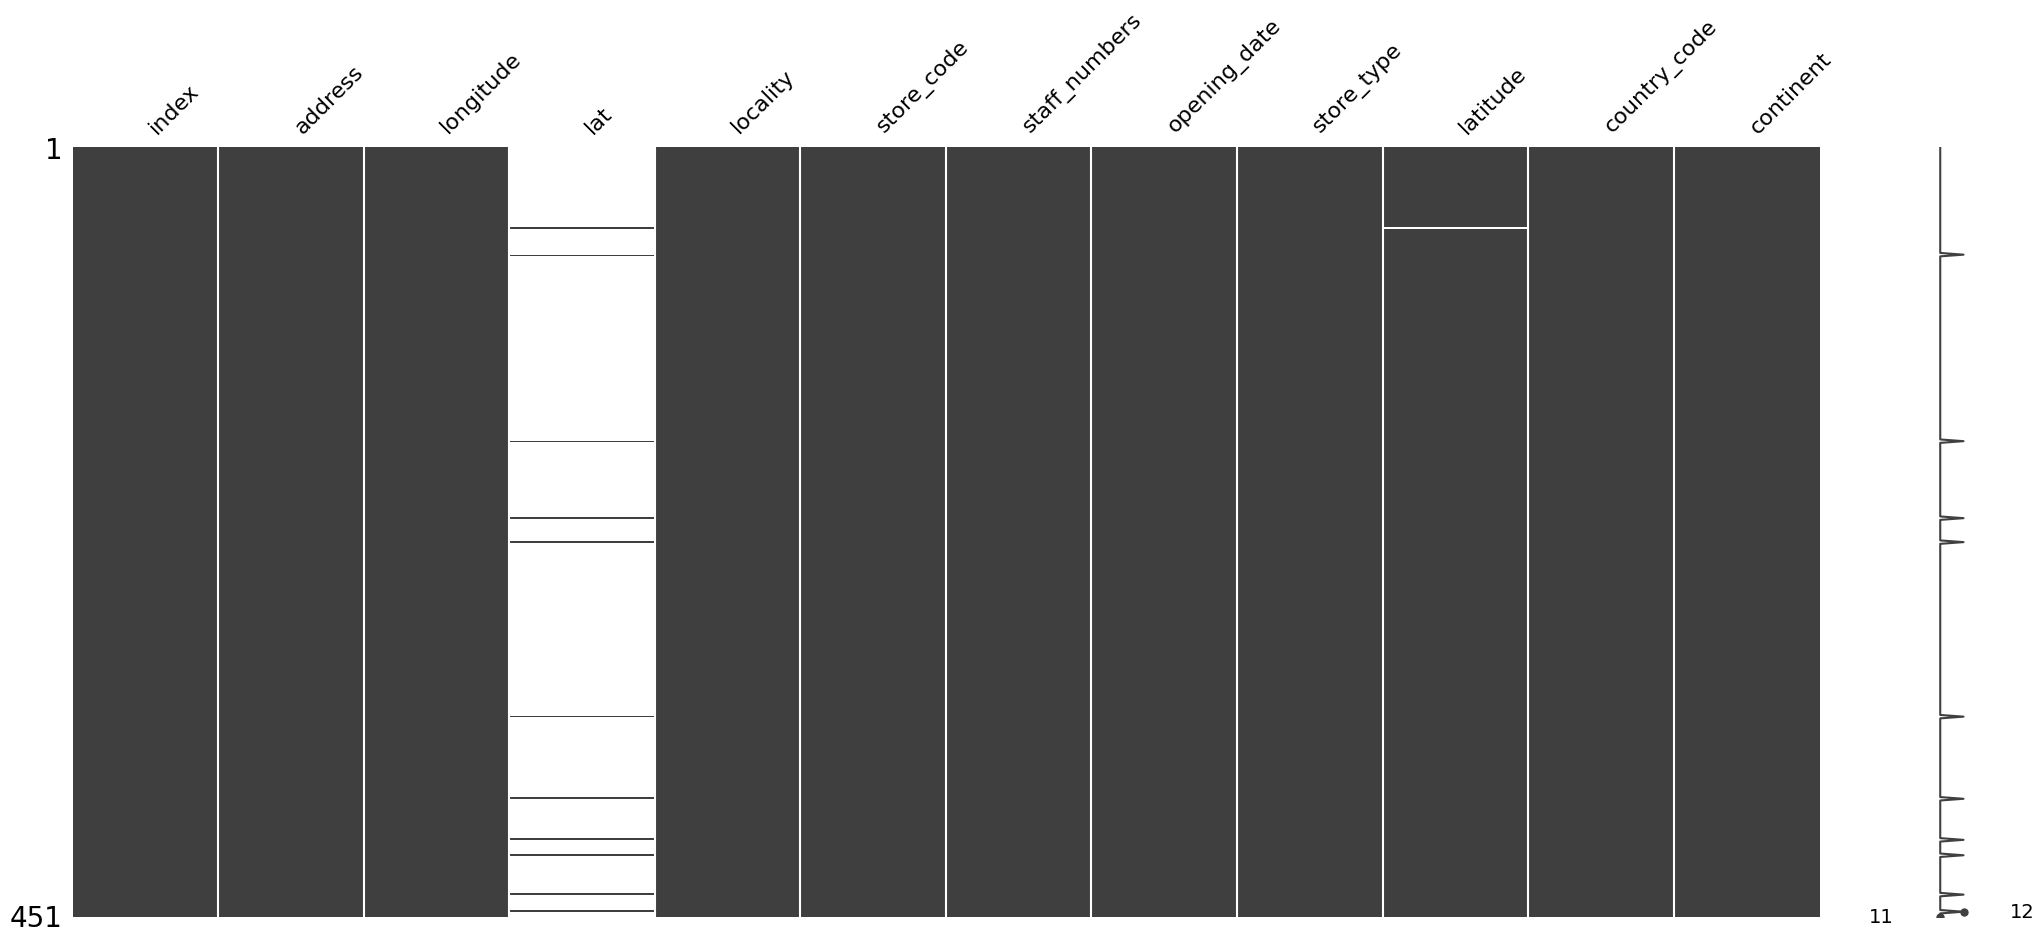

In [955]:
# Visualising Missing Data
import missingno as msno

msno.matrix(legacy_store_details_df)

In [956]:
import pandas as pd

# Show the rows where "lat" is notnull
print("Show the rows where \"lat\" is notnull:\n")
legacy_store_details_df_lat_notnull = legacy_store_details_df[legacy_store_details_df["lat"].notnull()]
display(legacy_store_details_df_lat_notnull)

# Display information about the DataFrame
display(legacy_store_details_df_lat_notnull.info())

print("The above show rows where data was found in the \"lat\" column. It can be seen the rows do not have useful data and the rows are to be removed.\n")

Show the rows where "lat" is notnull:



,index,address,longitude,lat,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent
47,0,N/A,N/A,N/A,N/A,WEB-1388012W,325,2010-06-12,Web Portal,None,GB,Europe
63,63,6FWDZHD7PW,1ZVU03X2P6,13KJZ890JH,9IBH8Y4Z0S,NRQKZWJ9OZ,BIP8K8JJW2,ZCXWWKF45G,QP74AHEQT0,1CJ5OAU4BR,YELVM536YT,QMAVR5H3LD
172,172,UBCIFQLSNY,Q1TJY8H1ZH,2XE1OWOC23,1T6B406CI8,QIUU9SVP51,SKBXAXF5G5,7AHXLXIUEF,O0QJIRC943,3ZR3F89D97,FP8DLXQVGH,LU3E036ZD9
217,217,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
231,231,RC99UKMZB2,2YBZ1440V6,OXVE5QR07O,6LVWPU1G64,Y8J0Z2W8O9,2429OB3LMM,0OLAK2I6NS,50IB01SFAZ,L13EQEQODP,HMHIFNLOBN,5586JCLARW
333,333,X349GIDWKU,O7NF1FZ74Y,VKA5I8H32X,RX9TCP2RGB,ISEE8A57FE,74BY7HSB6P,A3PMVM800J,0RSNUU3DF5,J3BPB68Z1J,F3AO8V2LHU,GFJQ2AAEQ8
381,381,ZBGB54ID4H,SKO4NMRNNF,LACCWDI0SB,CQMHKI78BX,T0R2CQBDUS,GT1FO6YGD4,GMMB02LA9V,B4KVQB3P5Y,AJHOMDOHZ4,OH20I92LX3,SLQBD982C0
405,405,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL
414,414,XTUAV57DP4,ID819KG3X5,A3O5CBWAMD,RY6K0AUE7F,TUOKF5HAAQ,FRTGHAA34B,13PIY8GD1H,X0FE7E2EOG,AE7EEW4HSS,OYVW925ZL8,XQ953VS0FG
437,437,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL


<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 47 to 447
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          11 non-null     int64 
 1   address        11 non-null     object
 2   longitude      11 non-null     object
 3   lat            11 non-null     object
 4   locality       11 non-null     object
 5   store_code     11 non-null     object
 6   staff_numbers  11 non-null     object
 7   opening_date   11 non-null     object
 8   store_type     11 non-null     object
 9   latitude       10 non-null     object
 10  country_code   11 non-null     object
 11  continent      11 non-null     object
dtypes: int64(1), object(11)
memory usage: 1.1+ KB


None

The above show rows where data was found in the "lat" column. It can be seen the rows do not have useful data and the rows are to be removed.



In [957]:
# Get the indices of rows to be removed
rows_to_remove_indices = legacy_store_details_df_lat_notnull.index

# Drop the rows from the original DataFrame
legacy_store_details_df_filtered = legacy_store_details_df.drop(index=rows_to_remove_indices)

# Display the filtered DataFrame
print("Filtered DataFrame with rows removed:\n")
display(legacy_store_details_df_filtered)


Filtered DataFrame with rows removed:



,index,address,longitude,lat,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent
0,1,"Flat 72W\nSally isle\nEast Deantown\nE7B 8EB, ...",51.62907,None,High Wycombe,HI-9B97EE4E,34,1996-10-25,Local,-0.74934,GB,Europe
1,2,"Heckerstraße 4/5\n50491 Säckingen, Landshut",48.52961,None,Landshut,LA-0772C7B9,92,2013-04-12,Super Store,12.16179,DE,Europe
2,3,"5 Harrison tunnel\nSouth Lydia\nWC9 2BE, Westbury",51.26,None,Westbury,WE-1DE82CEE,69,2014-01-02,Super Store,-2.1875,GB,Europe
3,4,Studio 6\nStephen landing\nSouth Simon\nB77 2W...,53.0233,None,Belper,BE-18074576,35,2019-09-09,Local,-1.48119,GB,Europe
4,5,Flat 92u\nChristian harbors\nPort Charlotte\nN...,53.38333,None,Gainsborough,GA-CAD01AC2,36,1995-05-15,Local,-0.76667,GB,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
445,445,"Flat 7\nStephanie lake\nMorrisside\nHP8 8LH, C...",50.76306,None,Cowes,CO-473A9FBB,94,2008-06-08,Super Store,-1.29772,GB,Europe
446,446,"Täschestraße 25\n39039 Nördlingen, Kirchlengern",52.2,None,Kirchlengern,KI-78096E8C,61,2005-05-12,Super Store,8.63333,DE,Europe
448,448,"Studio 8\nMoss mall\nWest Linda\nM0E 6XR, High...",51.62907,None,High Wycombe,HI-EEA7AE62,33,1998-05-14,Local,-0.74934,GB,Europe
449,449,"Baumplatz 6\n80114 Kötzting, Bretten",49.03685,None,Bretten,BR-662EC74C,35,2020-10-17,Local,8.70745,DE,Europe


<Axes: >

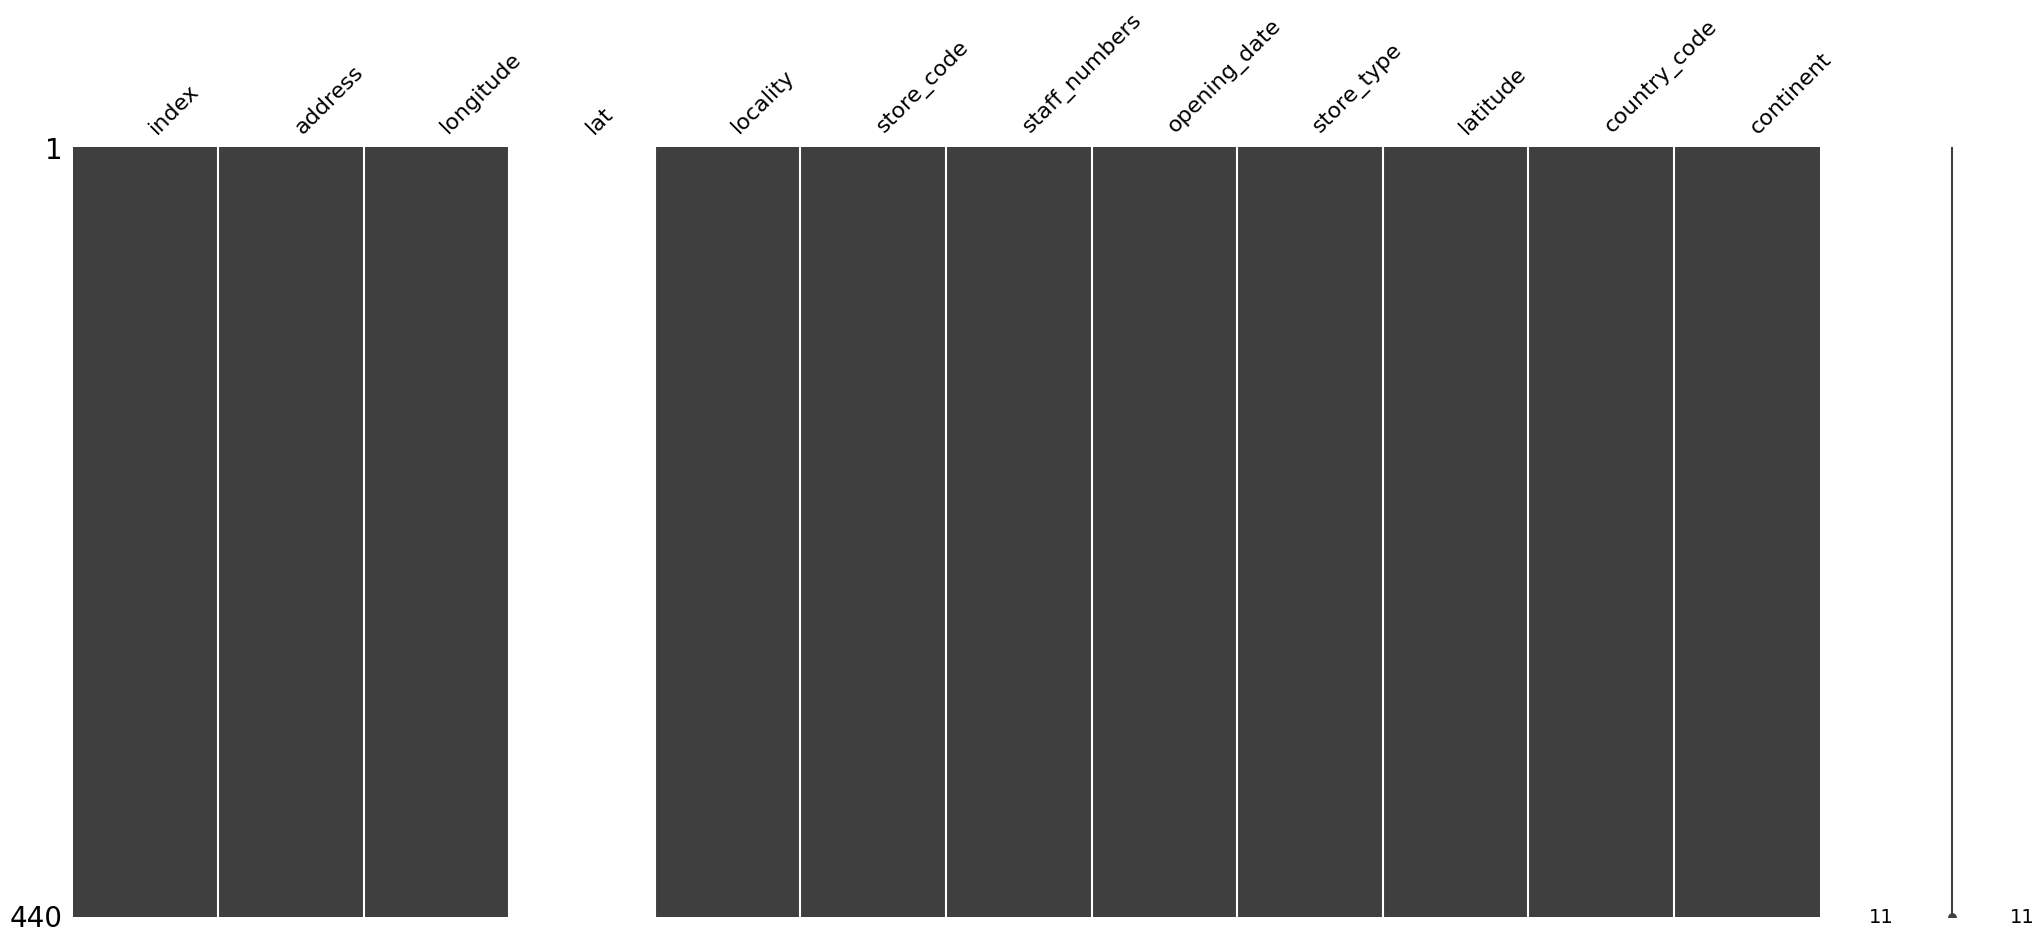

In [958]:
# Visualising Missing Data
import missingno as msno

msno.matrix(legacy_store_details_df_filtered)

In [959]:
# the 'lat' column
legacy_store_details_df_filtered.drop('lat', axis=1, inplace=True)

# Display the DataFrame after dropping the column
print("DataFrame after dropping 'lat' column:\n")
display(legacy_store_details_df_filtered)


DataFrame after dropping 'lat' column:



,index,address,longitude,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent
0,1,"Flat 72W\nSally isle\nEast Deantown\nE7B 8EB, ...",51.62907,High Wycombe,HI-9B97EE4E,34,1996-10-25,Local,-0.74934,GB,Europe
1,2,"Heckerstraße 4/5\n50491 Säckingen, Landshut",48.52961,Landshut,LA-0772C7B9,92,2013-04-12,Super Store,12.16179,DE,Europe
2,3,"5 Harrison tunnel\nSouth Lydia\nWC9 2BE, Westbury",51.26,Westbury,WE-1DE82CEE,69,2014-01-02,Super Store,-2.1875,GB,Europe
3,4,Studio 6\nStephen landing\nSouth Simon\nB77 2W...,53.0233,Belper,BE-18074576,35,2019-09-09,Local,-1.48119,GB,Europe
4,5,Flat 92u\nChristian harbors\nPort Charlotte\nN...,53.38333,Gainsborough,GA-CAD01AC2,36,1995-05-15,Local,-0.76667,GB,Europe
...,...,...,...,...,...,...,...,...,...,...,...
445,445,"Flat 7\nStephanie lake\nMorrisside\nHP8 8LH, C...",50.76306,Cowes,CO-473A9FBB,94,2008-06-08,Super Store,-1.29772,GB,Europe
446,446,"Täschestraße 25\n39039 Nördlingen, Kirchlengern",52.2,Kirchlengern,KI-78096E8C,61,2005-05-12,Super Store,8.63333,DE,Europe
448,448,"Studio 8\nMoss mall\nWest Linda\nM0E 6XR, High...",51.62907,High Wycombe,HI-EEA7AE62,33,1998-05-14,Local,-0.74934,GB,Europe
449,449,"Baumplatz 6\n80114 Kötzting, Bretten",49.03685,Bretten,BR-662EC74C,35,2020-10-17,Local,8.70745,DE,Europe


<Axes: >

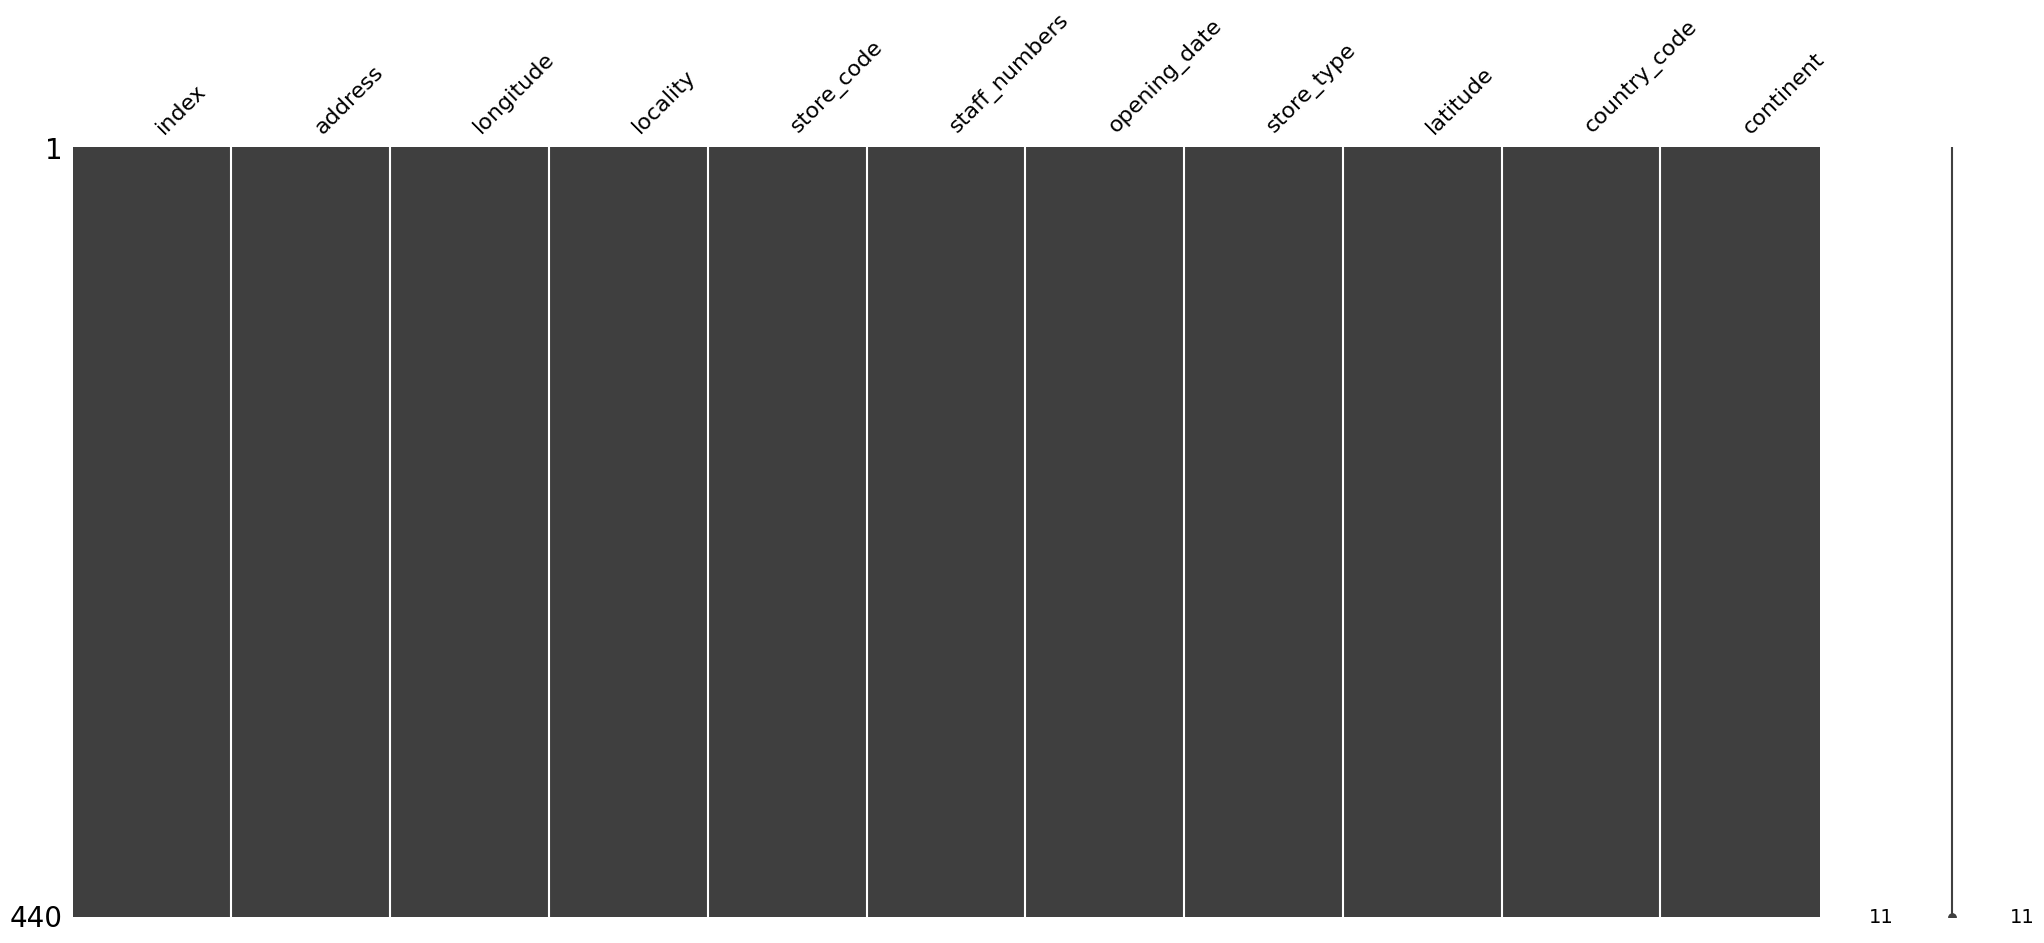

In [960]:
# Plot a missingno matrix of the dataframe
msno.matrix(legacy_store_details_df_filtered)

In [961]:
legacy_store_details_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 450
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          440 non-null    int64 
 1   address        440 non-null    object
 2   longitude      440 non-null    object
 3   locality       440 non-null    object
 4   store_code     440 non-null    object
 5   staff_numbers  440 non-null    object
 6   opening_date   440 non-null    object
 7   store_type     440 non-null    object
 8   latitude       440 non-null    object
 9   country_code   440 non-null    object
 10  continent      440 non-null    object
dtypes: int64(1), object(10)
memory usage: 41.2+ KB


# checking of index

In [962]:
print("list of unique values for 'index'")
print((legacy_store_details_df_filtered["index"].unique()))

list of unique values for 'index'
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 218 219
 220 221 222 223 224 225 226 227 228 229 230 232 233 234 235 236 237 238
 239 240 241 242 

In [963]:
print("count on unique values found in 'index'")

legacy_store_details_df_filtered["index"].nunique()


count on unique values found in 'index'


440

In [964]:

unique_count = legacy_store_details_df_filtered["index"].nunique()
print(unique_count)

440


# Checking of staff numbers

In [965]:
import pandas as pd
import re


# Define a regular expression to match integers without any other special characters
integer_pattern = re.compile(r'^\d+$')

'''
^: Asserts the start of the string.
\d: Matches any digit (0-9).
+: Matches one or more occurrences of the preceding element (\d in this case).
$: Asserts the end of the string.
'''

# Function to filter column based on the regular expression
def filter_df_column_for_non_integers(value):
    return bool(integer_pattern.match(str(value)))

# Apply the non integer filter to the 'staff_numbers' column and negate the condition using ~
legacy_store_details_df_sn_excluded = legacy_store_details_df_filtered[~legacy_store_details_df_filtered['staff_numbers'].apply(filter_df_column_for_non_integers)]

# Display the result
display(legacy_store_details_df_sn_excluded)
display(legacy_store_details_df_sn_excluded.info())

,index,address,longitude,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent
30,31,"Flat 69\nSuzanne walk\nEast Michelle\nE80 8HS,...",52.68333,East Dereham,EA-24B31935,J78,2012-11-09,Outlet,0.93333,GB,Europe
179,179,"Girschnerweg 163\n93597 Angermünde, Dahlem",52.4581,Dahlem,DA-ACC520AE,30e,1994-03-07,Local,13.28702,DE,Europe
248,248,"7430 Howe Extensions Suite 299\nKellyside, WA ...",39.71734,Sicklerville,SI-C489938D,80R,1994-02-28,Outlet,-74.96933,US,America
341,341,Studio 8\nLydia groves\nNorth Hilarymouth\nIV4...,50.79205,Southsea,SO-B5B9CB3B,A97,2018-05-08,Super Store,-1.08593,GB,Europe
375,375,"Salzstraße 1/9\n74209 Bad Freienwalde, Charlot...",52.53048,Charlottenburg-Nord,CH-99475026,3n9,1995-03-05,Local,13.29371,DE,Europe


<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 30 to 375
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          5 non-null      int64 
 1   address        5 non-null      object
 2   longitude      5 non-null      object
 3   locality       5 non-null      object
 4   store_code     5 non-null      object
 5   staff_numbers  5 non-null      object
 6   opening_date   5 non-null      object
 7   store_type     5 non-null      object
 8   latitude       5 non-null      object
 9   country_code   5 non-null      object
 10  continent      5 non-null      object
dtypes: int64(1), object(10)
memory usage: 480.0+ bytes


None

In [966]:
# Now apply the non integer filter to the 'staff_numbers' column 
legacy_store_details_df_sn_included = legacy_store_details_df_filtered[legacy_store_details_df_filtered['staff_numbers'].apply(filter_df_column_for_non_integers)]

# Display the result
display(legacy_store_details_df_sn_included)

,index,address,longitude,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent
0,1,"Flat 72W\nSally isle\nEast Deantown\nE7B 8EB, ...",51.62907,High Wycombe,HI-9B97EE4E,34,1996-10-25,Local,-0.74934,GB,Europe
1,2,"Heckerstraße 4/5\n50491 Säckingen, Landshut",48.52961,Landshut,LA-0772C7B9,92,2013-04-12,Super Store,12.16179,DE,Europe
2,3,"5 Harrison tunnel\nSouth Lydia\nWC9 2BE, Westbury",51.26,Westbury,WE-1DE82CEE,69,2014-01-02,Super Store,-2.1875,GB,Europe
3,4,Studio 6\nStephen landing\nSouth Simon\nB77 2W...,53.0233,Belper,BE-18074576,35,2019-09-09,Local,-1.48119,GB,Europe
4,5,Flat 92u\nChristian harbors\nPort Charlotte\nN...,53.38333,Gainsborough,GA-CAD01AC2,36,1995-05-15,Local,-0.76667,GB,Europe
...,...,...,...,...,...,...,...,...,...,...,...
445,445,"Flat 7\nStephanie lake\nMorrisside\nHP8 8LH, C...",50.76306,Cowes,CO-473A9FBB,94,2008-06-08,Super Store,-1.29772,GB,Europe
446,446,"Täschestraße 25\n39039 Nördlingen, Kirchlengern",52.2,Kirchlengern,KI-78096E8C,61,2005-05-12,Super Store,8.63333,DE,Europe
448,448,"Studio 8\nMoss mall\nWest Linda\nM0E 6XR, High...",51.62907,High Wycombe,HI-EEA7AE62,33,1998-05-14,Local,-0.74934,GB,Europe
449,449,"Baumplatz 6\n80114 Kötzting, Bretten",49.03685,Bretten,BR-662EC74C,35,2020-10-17,Local,8.70745,DE,Europe


In [967]:
# import pandas as pd
# import re
# import numpy as np


# print("legacy_store_details_df[\"staff_numbers\"] unique contents before cleaning:\n")
# unique_items_in_staff_numbers = sorted(legacy_store_details_df["staff_numbers"].unique())
# print(unique_items_in_staff_numbers, "\n")
# print("Unique items in staff numbers:\n")
# print(len(unique_items_in_staff_numbers), "\n")


In [968]:
# import pandas as pd
# import re
# import numpy as np


# print("legacy_store_details_df[\"staff_numbers\"] unique contents after cleaning:\n")
# unique_items_in_staff_numbers = sorted(legacy_store_details_df["staff_numbers"].unique())
# print(unique_items_in_staff_numbers, "\n")
# print("Unique items in staff numbers:\n")
# print(len(unique_items_in_staff_numbers), "\n")
# display(legacy_store_details_df.info())


In [969]:
def clean_staff_numbers(value):
    # Extract only numeric part and convert to int
    numeric_part = ''.join(filter(str.isdigit, value))
    return int(numeric_part)

# Apply the cleaning function to the 'staff_numbers' column
legacy_store_details_df_filtered['staff_numbers'] = legacy_store_details_df_filtered['staff_numbers'].apply(clean_staff_numbers)

# Display the cleaned DataFrame
print("legacy_store_details_df_filtered[\"staff_numbers\"] unique contents after cleaning:\n")
unique_items_in_staff_numbers = sorted(legacy_store_details_df_filtered["staff_numbers"].unique())
print(unique_items_in_staff_numbers, "\n")
print("Number of unique items in staff numbers:\n")
print(len(unique_items_in_staff_numbers), "\n")
display(legacy_store_details_df_filtered.info())

legacy_store_details_df_filtered["staff_numbers"] unique contents after cleaning:

[4, 5, 6, 7, 8, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 48, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 63, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 106, 107, 108, 109, 110, 111, 112, 113, 114, 117, 118, 119, 120, 122, 124, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139] 

Number of unique items in staff numbers:

101 

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 450
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          440 non-null    int64 
 1   address        440 non-null    object
 2   longitude      440 non-null    object
 3   locality       440 non-null    object
 4   store_code     440 non-null    object
 5   staff_numbers  440 non-null   

None

In [970]:
# # Suppose you want to select rows where 'column_name' has values in the list 'key_values'
# key_values = ['78', '30', '80', '97', '39']
# selected_rows = legacy_store_details_df[legacy_store_details_df["staff_numbers"].isin(key_values)]

# # Display the selected rows
# display(selected_rows)



<Axes: >

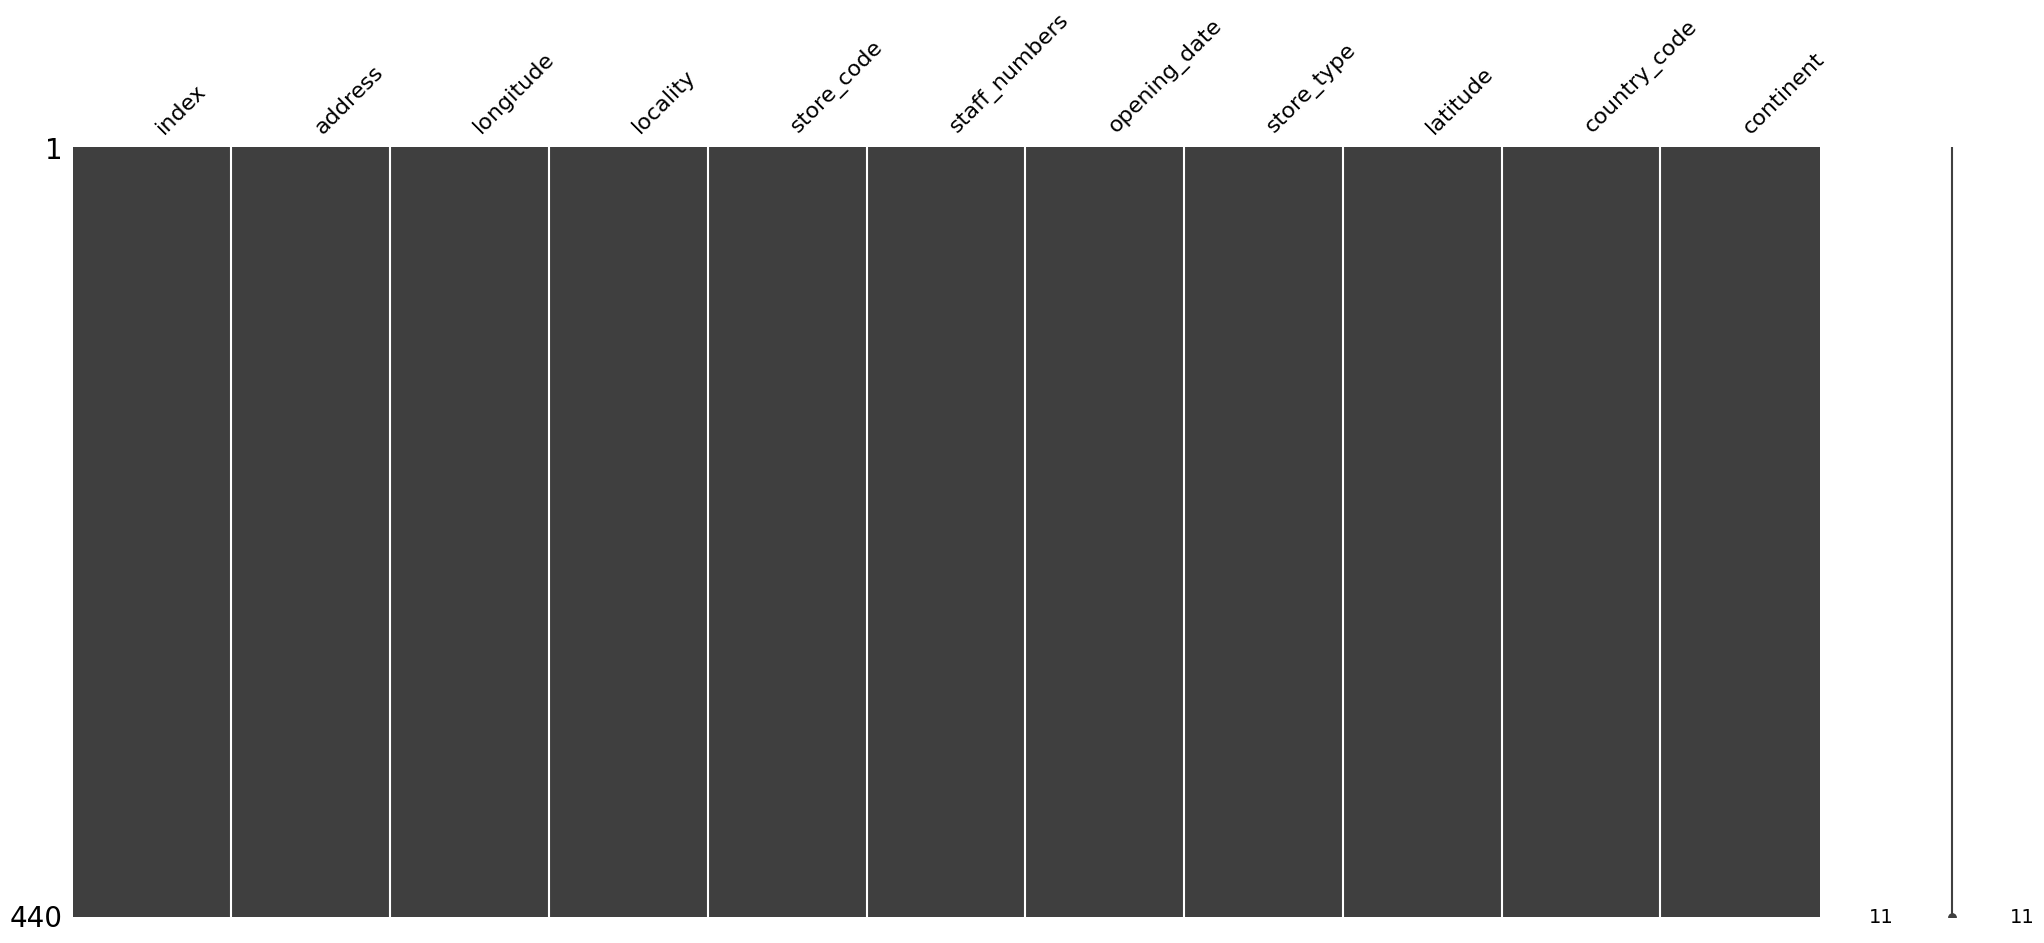

In [971]:
# Plot a missingno matrix of the dataframe
msno.matrix(legacy_store_details_df_filtered)

# Check store_code

In [972]:
print("Show only unique entries in legacy_store_details_df_filtered[\"store_code\"]:\n")
print(legacy_store_details_df_filtered["store_code"].unique(), "\n")
print("Number of unique items in legacy_store_details_df_filtered[\"store_code\"].")
display(legacy_store_details_df_filtered["store_code"].nunique())
display(legacy_store_details_df_filtered.info())

Show only unique entries in legacy_store_details_df_filtered["store_code"]:

['HI-9B97EE4E' 'LA-0772C7B9' 'WE-1DE82CEE' 'BE-18074576' 'GA-CAD01AC2'
 'RU-C603E990' 'ST-229D997E' 'KA-FA7ED3B8' 'HA-974352FE' 'RU-9F1136B4'
 'SI-ECD52CD9' 'DE-585399CF' 'CR-792AA8BB' 'HA-39A446E2' 'LA-9B0D9277'
 'NE-1D8B1D0C' 'LY-4C3D5D6C' 'CH-6A561423' 'BA-898BDED3' 'EA-77ECA680'
 'PO-38790FAE' 'BU-251A0E5A' 'EH-91356030' 'AB-917B715E' 'SU-0B4C9A5F'
 'IN-157E1191' 'GA-DA8EEA4A' 'LA-2B59A825' 'WE-31C8B335' 'LA-F1042C48'
 'EA-24B31935' 'EA-7965E06D' 'PE-040B15C3' 'EH-DB8676C1' 'AL-91D3A03C'
 'HE-E39F4BC6' 'PO-47A01287' 'LA-D78C5F3F' 'ME-31958763' 'AR-5E72668B'
 'CO-CB3D8C89' 'CL-5C7C3198' 'BO-17E7B6CE' 'CH-619E036C' 'BR-BC499EDD'
 'NE-E50207AD' 'BE-8C0CF738' 'NE-374D3983' 'SU-95D20AE9' 'ME-FB62E459'
 'KA-653E783F' 'MA-F0E23355' 'OS-70B2CD28' 'KI-A53AF10A' 'LE-63F3D33B'
 'VE-93DA8430' 'HI-BAD4DD1C' 'RU-1994A94D' 'LE-84C48B9F' 'SC-4928418D'
 'EP-105C3FB5' 'CH-7771B336' 'LO-AB6B6DF8' 'BU-44F16401' 'RU-9DF20437'


440

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 450
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          440 non-null    int64 
 1   address        440 non-null    object
 2   longitude      440 non-null    object
 3   locality       440 non-null    object
 4   store_code     440 non-null    object
 5   staff_numbers  440 non-null    int64 
 6   opening_date   440 non-null    object
 7   store_type     440 non-null    object
 8   latitude       440 non-null    object
 9   country_code   440 non-null    object
 10  continent      440 non-null    object
dtypes: int64(2), object(9)
memory usage: 41.2+ KB


None

In [973]:
import plotly.express as px

# Assuming 'orders_table_df2' is your DataFrame
legacy_store_details_df_filtered['store_code_length'] = legacy_store_details_df_filtered['store_code'].astype(str).apply(len)

store_code_length = px.histogram(legacy_store_details_df_filtered, 'store_code_length')
store_code_length.show()


In [974]:
display(legacy_store_details_df_filtered)

,index,address,longitude,locality,store_code,staff_numbers,opening_date,store_type,latitude,country_code,continent,store_code_length
0,1,"Flat 72W\nSally isle\nEast Deantown\nE7B 8EB, ...",51.62907,High Wycombe,HI-9B97EE4E,34,1996-10-25,Local,-0.74934,GB,Europe,11
1,2,"Heckerstraße 4/5\n50491 Säckingen, Landshut",48.52961,Landshut,LA-0772C7B9,92,2013-04-12,Super Store,12.16179,DE,Europe,11
2,3,"5 Harrison tunnel\nSouth Lydia\nWC9 2BE, Westbury",51.26,Westbury,WE-1DE82CEE,69,2014-01-02,Super Store,-2.1875,GB,Europe,11
3,4,Studio 6\nStephen landing\nSouth Simon\nB77 2W...,53.0233,Belper,BE-18074576,35,2019-09-09,Local,-1.48119,GB,Europe,11
4,5,Flat 92u\nChristian harbors\nPort Charlotte\nN...,53.38333,Gainsborough,GA-CAD01AC2,36,1995-05-15,Local,-0.76667,GB,Europe,11
...,...,...,...,...,...,...,...,...,...,...,...,...
445,445,"Flat 7\nStephanie lake\nMorrisside\nHP8 8LH, C...",50.76306,Cowes,CO-473A9FBB,94,2008-06-08,Super Store,-1.29772,GB,Europe,11
446,446,"Täschestraße 25\n39039 Nördlingen, Kirchlengern",52.2,Kirchlengern,KI-78096E8C,61,2005-05-12,Super Store,8.63333,DE,Europe,11
448,448,"Studio 8\nMoss mall\nWest Linda\nM0E 6XR, High...",51.62907,High Wycombe,HI-EEA7AE62,33,1998-05-14,Local,-0.74934,GB,Europe,11
449,449,"Baumplatz 6\n80114 Kötzting, Bretten",49.03685,Bretten,BR-662EC74C,35,2020-10-17,Local,8.70745,DE,Europe,11


In [975]:
print("Unique values in legacy_store_details_df_filtered[\"store_code_length\"]:", np.sort(legacy_store_details_df_filtered["store_code_length"].unique()))

Unique values in legacy_store_details_df_filtered["store_code_length"]: [11]


# Check continent

In [976]:
print("Show only unique entries in legacy_store_details_df_filtered[\"continent\"]:\n")
print(legacy_store_details_df_filtered["continent"].unique(), "\n")
print("Number of unique items in legacy_store_details_df_filtered[\"continent\"].")
display(legacy_store_details_df_filtered["continent"].nunique())
display(legacy_store_details_df_filtered.info())

Show only unique entries in legacy_store_details_df_filtered["continent"]:

['Europe' 'America' 'eeEurope' 'eeAmerica'] 

Number of unique items in legacy_store_details_df_filtered["continent"].


4

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 450
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              440 non-null    int64 
 1   address            440 non-null    object
 2   longitude          440 non-null    object
 3   locality           440 non-null    object
 4   store_code         440 non-null    object
 5   staff_numbers      440 non-null    int64 
 6   opening_date       440 non-null    object
 7   store_type         440 non-null    object
 8   latitude           440 non-null    object
 9   country_code       440 non-null    object
 10  continent          440 non-null    object
 11  store_code_length  440 non-null    int64 
dtypes: int64(3), object(9)
memory usage: 44.7+ KB


None

In [977]:
legacy_store_details_df_filtered['continent'] = legacy_store_details_df_filtered['continent'].replace({'eeEurope': 'Europe', 'eeAmerica': 'America'})
legacy_store_details_df_continent_check = legacy_store_details_df_filtered['continent']
print(legacy_store_details_df_continent_check.value_counts())


continent
Europe     406
America     34
Name: count, dtype: int64


# Check store_type

In [978]:
print("Show only unique entries in legacy_store_details_df_filtered[\"store_type\"]:\n")
print(legacy_store_details_df_filtered["store_type"].unique(), "\n")
print("Number of unique items in legacy_store_details_df_filtered[\"store_type\"].")
display(legacy_store_details_df_filtered["store_type"].nunique())
display(legacy_store_details_df_filtered.info())

Show only unique entries in legacy_store_details_df_filtered["store_type"]:

['Local' 'Super Store' 'Mall Kiosk' 'Outlet'] 

Number of unique items in legacy_store_details_df_filtered["store_type"].


4

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 450
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              440 non-null    int64 
 1   address            440 non-null    object
 2   longitude          440 non-null    object
 3   locality           440 non-null    object
 4   store_code         440 non-null    object
 5   staff_numbers      440 non-null    int64 
 6   opening_date       440 non-null    object
 7   store_type         440 non-null    object
 8   latitude           440 non-null    object
 9   country_code       440 non-null    object
 10  continent          440 non-null    object
 11  store_code_length  440 non-null    int64 
dtypes: int64(3), object(9)
memory usage: 44.7+ KB


None

# Check opening_date

In [979]:
print("Show only unique entries in legacy_store_details_df_filtered[\"opening_date\"]:\n")
print(legacy_store_details_df_filtered["opening_date"].unique(), "\n")
print("Number of unique items in legacy_store_details_df_filtered[\"opening_date\"].")
display(legacy_store_details_df_filtered["opening_date"].nunique())
display(legacy_store_details_df_filtered.info())

Show only unique entries in legacy_store_details_df_filtered["opening_date"]:

['1996-10-25' '2013-04-12' '2014-01-02' '2019-09-09' '1995-05-15'
 '2001-01-04' '2000-06-01' '2022-09-05' '2004-09-11' 'October 2012 08'
 'July 2015 14' '2014-10-11' '2018-04-05' '1994-03-08' '2020-06-05'
 '2004-05-02' '2016-02-12' '2008-01-21' '2022-08-01' '1994-08-12'
 '2010-10-19' '2013-08-05' '2017-12-12' '2002-06-18' '2007-06-24'
 '2017-11-04' '2008-07-08' '1998-12-23' '2011-03-11' '2010-08-25'
 '2012-11-09' '2016-10-07' '2018-08-15' '1996-10-02' '2018-06-18'
 '1995-06-04' '1994-10-18' '2002-07-21' '2013-12-23' '2006-10-04'
 '1999-07-17' '1998-12-19' '2019-07-28' '2017-10-21' '2020-05-13'
 '2019-12-24' '2002-04-03' '2009-08-07' '2004-05-23' '2001-07-11'
 '1998-07-07' '2011-07-07' '2007-02-04' '1993-10-13' '2006-06-16'
 '2006-02-23' '2019-09-08' '1993-09-03' '2002-01-18' '2009-04-14'
 '2014-07-16' '2012-05-15' '2006-01-13' '2019-01-11' '1994-05-26'
 '2015-02-16' '2002-03-30' '2003-04-19' '2017-04-15' '19

431

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 0 to 450
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              440 non-null    int64 
 1   address            440 non-null    object
 2   longitude          440 non-null    object
 3   locality           440 non-null    object
 4   store_code         440 non-null    object
 5   staff_numbers      440 non-null    int64 
 6   opening_date       440 non-null    object
 7   store_type         440 non-null    object
 8   latitude           440 non-null    object
 9   country_code       440 non-null    object
 10  continent          440 non-null    object
 11  store_code_length  440 non-null    int64 
dtypes: int64(3), object(9)
memory usage: 44.7+ KB


None

# Check for duplicate rows

In [980]:
duplicates = legacy_store_details_df.duplicated()
print(legacy_store_details_df[duplicates])

Empty DataFrame
Columns: [index, address, longitude, lat, locality, store_code, staff_numbers, opening_date, store_type, latitude, country_code, continent]
Index: []
